# 07/05/2017 Update

This project is based on my [GitHub link][1] and my research is based on  [this paper][2]. 

Instead of using Echo state network which was used in the Stanford research paper, we are going to use LSTM which is more advanced in training the neural network.

More updates will be provided to accommodate the dataset in this Kaggle challenge.  You can simply adjust it to choose your features and window for data.

Thank you all!

# Import module first


  [1]: https://github.com/BenjiKCF/Neural-Network-with-Financial-Time-Series-Data
  [2]: http://cs229.stanford.edu/proj2012/BernalFokPidaparthi-FinancialMarketTimeSeriesPredictionwithRecurrentNeural.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os

c:\users\gelo\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Read data and transform them to pandas dataframe

### Load Data

In [2]:
df = pd.read_csv("data/Engineered_2_merged_mmda_wwo_Taft Ave._2015.csv", index_col = 0)
df.tail()

,lineName,stationName,statusN,statusS,tempC,tempF,windspeedMiles,windspeedKmph,winddirDegree,cond,...,feelsLikeF_Rmax (window = 2),feelsLikeF_Rmean (window = 3),feelsLikeF_Rmin (window = 3),feelsLikeF_Rmax (window = 3),feelsLikeF_Rmean (window = 4),feelsLikeF_Rmin (window = 4),feelsLikeF_Rmax (window = 4),feelsLikeF_Rmean (window = 5),feelsLikeF_Rmin (window = 5),feelsLikeF_Rmax (window = 5)
dt,,,,,,,,,,,,,,,,,,,,,
2015-12-31 22:45:00,EDSA,Taft Ave.,0.362331,0.5,0.250000,0.250000,0.250000,0.250000,0.169972,0.631579,...,0.490566,0.245283,0.245283,0.245283,0.245283,0.245283,0.981132,0.248113,0.245283,0.259434
2015-12-31 23:00:00,EDSA,Taft Ave.,0.362753,0.5,0.250000,0.250000,0.250000,0.250000,0.169972,0.631579,...,0.490566,0.245283,0.245283,0.245283,0.245283,0.245283,0.981132,0.245283,0.245283,0.245283
2015-12-31 23:15:00,EDSA,Taft Ave.,0.363176,0.5,0.250694,0.251157,0.255952,0.255997,0.170129,0.624269,...,0.490566,0.245283,0.245283,0.245283,0.245283,0.245283,0.981132,0.245283,0.245283,0.245283
2015-12-31 23:30:00,EDSA,Taft Ave.,0.363598,0.5,0.251389,0.252315,0.261905,0.261995,0.170286,0.616959,...,0.492662,0.245283,0.245283,0.245283,0.245283,0.245283,0.981132,0.245283,0.245283,0.245283
2015-12-31 23:45:00,EDSA,Taft Ave.,0.364020,0.5,0.252083,0.253472,0.267857,0.267992,0.170444,0.609649,...,0.496855,0.245982,0.245283,0.247379,0.245283,0.245283,0.981132,0.245283,0.245283,0.245283


In [4]:
# Move label to be predicted at the end
Y_COL_NAME = ['statusS']
df_final = df[[c for c in df if c not in Y_COL_NAME] + [c for c in Y_COL_NAME if c in df]]
df_final.tail()

,lineName,stationName,statusN,tempC,tempF,windspeedMiles,windspeedKmph,winddirDegree,cond,precipMM,...,feelsLikeF_Rmean (window = 3),feelsLikeF_Rmin (window = 3),feelsLikeF_Rmax (window = 3),feelsLikeF_Rmean (window = 4),feelsLikeF_Rmin (window = 4),feelsLikeF_Rmax (window = 4),feelsLikeF_Rmean (window = 5),feelsLikeF_Rmin (window = 5),feelsLikeF_Rmax (window = 5),statusS
dt,,,,,,,,,,,,,,,,,,,,,
2015-12-31 22:45:00,EDSA,Taft Ave.,0.362331,0.250000,0.250000,0.250000,0.250000,0.169972,0.631579,0.007743,...,0.245283,0.245283,0.245283,0.245283,0.245283,0.981132,0.248113,0.245283,0.259434,0.5
2015-12-31 23:00:00,EDSA,Taft Ave.,0.362753,0.250000,0.250000,0.250000,0.250000,0.169972,0.631579,0.008850,...,0.245283,0.245283,0.245283,0.245283,0.245283,0.981132,0.245283,0.245283,0.245283,0.5
2015-12-31 23:15:00,EDSA,Taft Ave.,0.363176,0.250694,0.251157,0.255952,0.255997,0.170129,0.624269,0.022616,...,0.245283,0.245283,0.245283,0.245283,0.245283,0.981132,0.245283,0.245283,0.245283,0.5
2015-12-31 23:30:00,EDSA,Taft Ave.,0.363598,0.251389,0.252315,0.261905,0.261995,0.170286,0.616959,0.036382,...,0.245283,0.245283,0.245283,0.245283,0.245283,0.981132,0.245283,0.245283,0.245283,0.5
2015-12-31 23:45:00,EDSA,Taft Ave.,0.364020,0.252083,0.253472,0.267857,0.267992,0.170444,0.609649,0.050147,...,0.245982,0.245283,0.247379,0.245283,0.245283,0.981132,0.245283,0.245283,0.245283,0.5


# Create training set and testing set

In [12]:
def load_data(stock, seq_len, split_percent):

    amount_of_features = len(stock.columns) - 1
 
    data = stock.as_matrix() 

    sequence_length = seq_len + 1 # index starting from 0
    
    x_data = []
    y_data = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        x_data.append(data[index: index + sequence_length, 0:amount_of_features]) # index : index + 22days
        y_data.append(data[index: index + sequence_length, -1]) # index : index + 22days

    x_data = np.array(x_data)
    y_data = np.array(y_data)
    row = round(split_percent * x_data.shape[0]) # 90% split
    
    x_train = x_data[:int(row), :-1]
    
    y_train = y_data[:int(row), -1]
    
    x_test = x_data[int(row):, :-1]
    
    y_test = y_data[int(row):, -1]
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

# Build the structure of model

Based on my hyperparameter testing on [here][1]. I found that these parameters are the most suitable for this task.

![dropout = 0.3][2]
![epochs = 90][3]
![LSTM 256 > LSTM 256 > Relu 32 > Linear 1][4]



  [1]: https://github.com/BenjiKCF/Neural-Network-with-Financial-Time-Series-Data
  [2]: https://github.com/BenjiKCF/Neural-Network-with-Financial-Time-Series-Data/blob/master/dropout.png?raw=true
  [3]: https://github.com/BenjiKCF/Neural-Network-with-Financial-Time-Series-Data/blob/master/epochs2.png?raw=true
  [4]: https://github.com/BenjiKCF/Neural-Network-with-Financial-Time-Series-Data/blob/master/neurons.png?raw=true

In [13]:
def build_model(layers):
    d = 0.3
    model = Sequential()
    
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # adam = keras.optimizers.Adam(decay=0.2)
        
    start = time.time()
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

# Train the model

In [16]:
WINDOW_SIZE = 10
PERCENT_SPLIT = 0.9
X_train, y_train, X_test, y_test = load_data(df_final, WINDOW_SIZE, PERCENT_SPLIT)

In [17]:
model = build_model([len(df_final.columns) - 1,WINDOW_SIZE ,1])

Compilation Time :  0.027069568634033203


In [18]:
model.fit(X_train,y_train,batch_size=512,epochs=10,validation_split=0.1,verbose=1)

Train on 28373 samples, validate on 3153 samples
Epoch 1/10
28373/28373 [==============================] - 58s 2ms/step - loss: 0.1676 - acc: 0.4253 - val_loss: 0.1463 - val_acc: 0.2772
Epoch 2/10
28373/28373 [==============================] - 3s 119us/step - loss: 0.1000 - acc: 0.4985 - val_loss: 0.1449 - val_acc: 0.3673
Epoch 3/10
28373/28373 [==============================] - 3s 115us/step - loss: 0.0933 - acc: 0.5162 - val_loss: 0.1454 - val_acc: 0.3559
Epoch 4/10
28373/28373 [==============================] - 3s 123us/step - loss: 0.0923 - acc: 0.5167 - val_loss: 0.1490 - val_acc: 0.3552
Epoch 5/10
28373/28373 [==============================] - 4s 129us/step - loss: 0.0910 - acc: 0.5193 - val_loss: 0.1444 - val_acc: 0.3562
Epoch 6/10
28373/28373 [==============================] - 3s 117us/step - loss: 0.0901 - acc: 0.5226 - val_loss: 0.1600 - val_acc: 0.3454
Epoch 7/10
28373/28373 [==============================] - 3s 117us/step - loss: 0.0896 - acc: 0.5221 - val_loss: 0.1492 - va

# Evaluate model

In [19]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]


model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.09191 MSE (0.30 RMSE)
Test Score: 0.10768 MSE (0.33 RMSE)


(0.09191358744888252, 0.10768204050305023)

# Visualize prediction

In [20]:
# print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
print (p.shape)
# for each data index in test data
for u in range(len(y_test)):
    # pr = prediction day u
    pr = p[u][0]
    # (y_test day u / pr) - 1
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    # print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))
    # Last day prediction
    # print(p[-1]) 

(3503, 1)


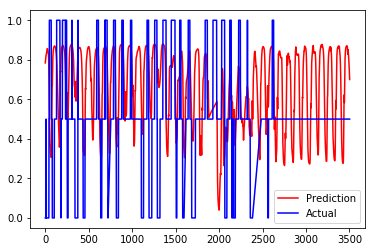

In [21]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='Prediction')
plt2.plot(y_test,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()